# 06 | 聚类

## metrics
### 外部指标

### 内部指标



## 原型聚类

### k-means

#### K值选择

**(1)肘部法**

肘部法所使用的聚类评价指标为：数据集中所有样本点到其簇中心的距离之和的平方。但是肘部法选择的并不是误差平方和最小的k，而是误差平方和突然变小时对应的$k$值。

- 平均离差法
- 基于SSE法：SSE是误差平方和，即所有样本点到其簇中心的距离之和的平方

**(2)轮廓系数法**

轮廓系数是一种非常常用的聚类效果评价指标。该指标结合了内聚度和分离度两个因素。其具体计算过程如下：

假设已经通过聚类算法将待分类的数据进行了聚类，并最终得到了k个簇。对于每个簇中的每个样本点i，分别计算其轮廓系数。具体地，需要对每个样本点i计算以下两个指标：

- $a(i)$: 样本点i到与其属于同一个簇的其他样本点的距离的平均值。$a(i)$越小，说明该样本i属于该类的可能性越大。
- $b(i)$: 样本点i到其他簇$C_j$ 中的所有样本的平均距离$b_{ij}$的最小值，$b(i) = \min(b_{i1}, b_{i2}, \cdots, b_{ik})$

则样本点i的轮廓系数为：

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

而所有样本点i的轮廓系数的平均值，即为该聚类结果总的轮廓系数 $S$ 。$S \in [-1, 1]$ ，$S$ 越接近与1，聚类效果越好。


#### 初始点选择

**随机选择**

最简单的方法是随机选择K个数据点作为初始点。优点是简单且易于实现，缺点是可能会导致结果不稳定、易受到初始点的影响，产生较差的聚类结果。

**K-means++**

K-means++算法改进了随机选择初始点的方法，旨在选择更好的初始点，提高聚类结果的质量。它的步骤如下：

- 选择一个随机点作为第一个初始点。

- 对于每个数据点，计算其与已选择的初始点之间的距离，并选择距离最大的点作为新的初始点。

- 重复上述步骤，直到选择了K个初始点。

优点是能够选择较好的初始点，提高聚类结果的准确性和稳定性。缺点是相对于随机选择，算法的计算复杂度略高。

**K-means||**

K-means||是对大数据集的改进，能够有效地选择初始点。它的步骤如下：

- 随机选择一个点作为初始点。

- 对于每个数据点，计算其与已选择的初始点之间的距离，并根据一定的概率选择该点作为新的初始点。

- 重复上述步骤，直到选择了足够数量的初始点（大致为log(K)个）。

优点是适用于大数据集，减少了计算开销。缺点是需要调节概率参数，且在实践中对于小数据集可能不如K-means++效果好。


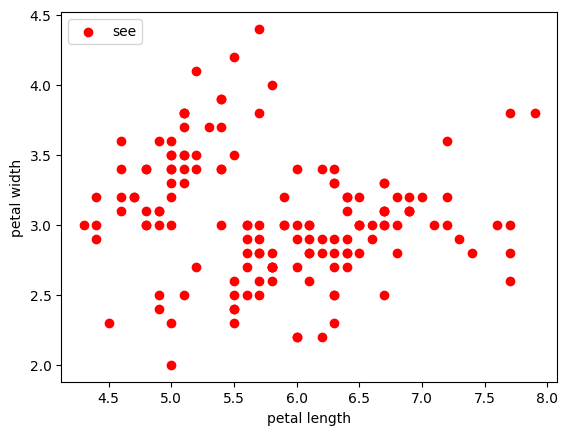

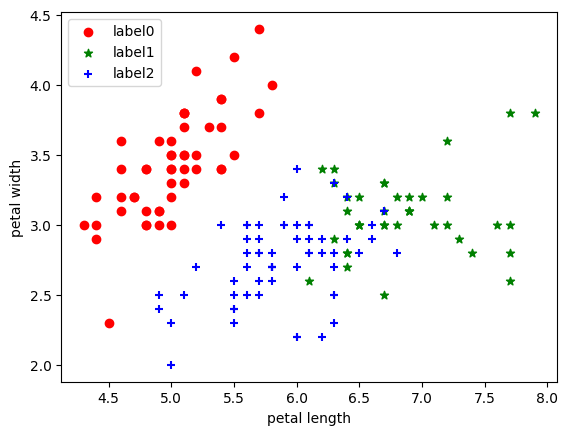

In [1]:
# K-means-鸢尾花聚类
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:] ##表示我们只取特征空间中的后两个维度


#绘制数据分布图
plt.scatter(X[:, 0], X[:, 1], c = "red", marker='o', label='see')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()
 
 
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签

#绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)

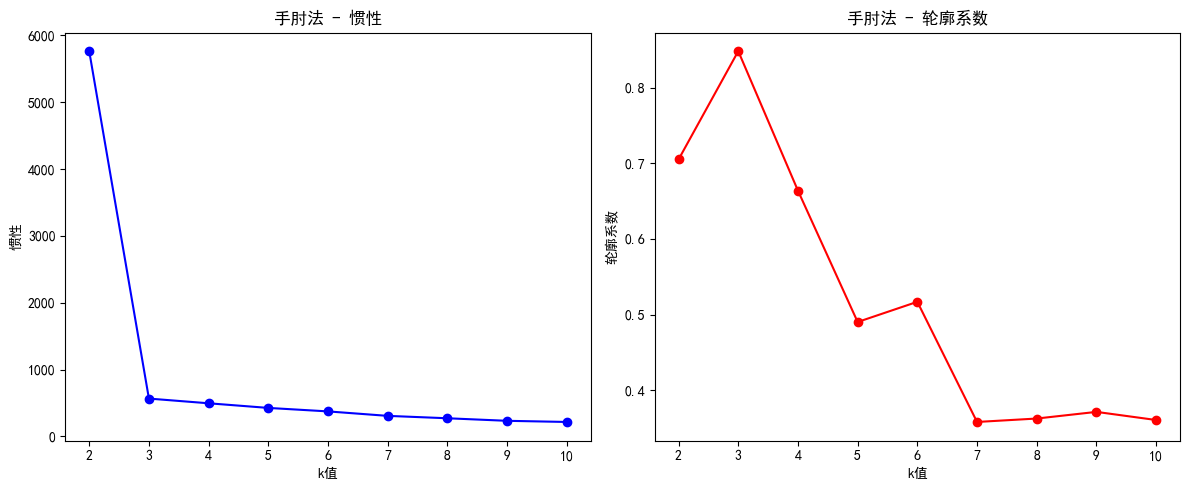

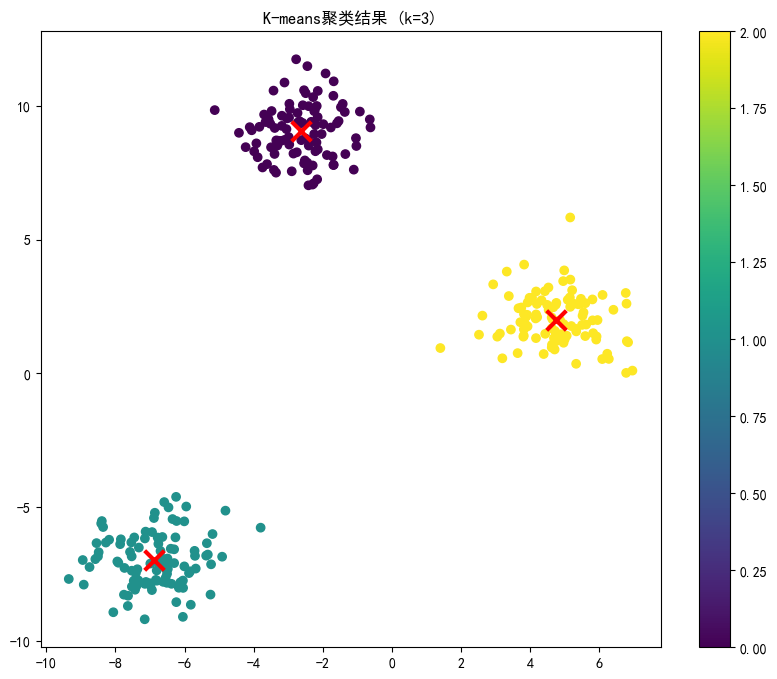

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 生成样本数据
def generate_data(n_samples=300, n_features=2, n_centers=3):
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=42)
    return X

# 使用手肘法选择最佳的k值
def elbow_method(X, max_k=10):
    inertias = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_) # 计算SSE
        silhouette_scores.append(silhouette_score(X, kmeans.labels_)) # 计算轮廓系数，计算公式详见上方
    
    # 绘制手肘图
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('k值')
    plt.ylabel('惯性')
    plt.title('手肘法 - 惯性')
    
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.xlabel('k值')
    plt.ylabel('轮廓系数')
    plt.title('手肘法 - 轮廓系数')
    
    plt.tight_layout()
    plt.show()

# 执行k-means聚类并可视化结果
def kmeans_clustering(X, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # 可视化聚类结果
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
    plt.title(f'K-means聚类结果 (k={k})')
    plt.colorbar(scatter)
    plt.show()

# 主函数
def main():
    
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使折线图显示中文
    plt.rcParams['axes.unicode_minus'] = False		# 显示负号
    X = generate_data()
    
    # 使用手肘法选择最佳的k值
    elbow_method(X)
    
    # 根据手肘法结果选择合适的k值
    try:
        k = int(input("请根据手肘法结果输入合适的k值 (默认值为3): "))
    except:
        k = 3

    kmeans_clustering(X, k)

if __name__ == "__main__":
    main()


### LVQ | 学习向量量化


!!! bug "缺点"
    对于同一类当中有距离很大的样本点，无法处理（香肠型的）


### 高斯混合聚类


## 密度聚类

### DBSCAN

### OPTICS

## 层次聚类
产生不同层次的聚类结果，可以通过树状图来表示
### AGNES
